In [1]:
import numpy as np
import os
import PIL
import tensorflow as tf

In [2]:
print(tf.__version__)

2.6.0


In [3]:
base_dir = "../data.copy/"

In [4]:
from keras.preprocessing import image

In [5]:
img_tensor = []
img_label = []

In [6]:
class_names = ['박진성', '서정범', '이가휴', '이동현', '이흥교', '정정윤2', '조혁진']

In [7]:
for userfold in os.listdir(base_dir):
    for imgname in os.listdir(base_dir+userfold+'/true'):
        img = image.load_img(
            base_dir + userfold + '/true' + '/' + imgname, 
            color_mode='grayscale', 
            target_size=(60, 120), 
            interpolation='nearest')
        img_tensor.append(image.img_to_array(img)/255)
        img_label.append(class_names.index(userfold))

In [8]:
img_tensor_np = np.array(img_tensor)
img_label_np = np.array(img_label)

In [9]:
img_tensor_np.shape

(77, 60, 120, 1)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(img_tensor_np, img_label_np, test_size=0.2, random_state=10)

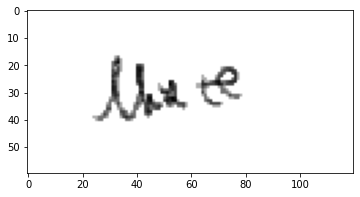

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 3)

plt.imshow(img_tensor_np[0], cmap='gray')
plt.show()

In [13]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16, kernel_size=3, activation='relu', input_shape=(60, 120, 1)))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(len(class_names), activation='softmax'))


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 58, 118, 16)       160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 59, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 59, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 29, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 14, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [15]:
model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

In [16]:
x_train.shape

(61, 60, 120, 1)

In [17]:
epochs = 20

In [18]:
history = model.fit(
    x_train,
    y_train,
    epochs=epochs,
    batch_size=3
)

Epoch 1/20


C:\Python\Python39\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


21/21 [==============================] - 0s 8ms/step - loss: 1.9906 - accuracy: 0.0656
Epoch 2/20
21/21 [==============================] - 0s 8ms/step - loss: 1.9467 - accuracy: 0.1148
Epoch 3/20
21/21 [==============================] - 0s 8ms/step - loss: 1.7731 - accuracy: 0.3934
Epoch 4/20
21/21 [==============================] - 0s 8ms/step - loss: 0.7385 - accuracy: 0.7377
Epoch 5/20
21/21 [==============================] - 0s 8ms/step - loss: 0.1985 - accuracy: 0.9508
Epoch 6/20
21/21 [==============================] - 0s 8ms/step - loss: 0.1771 - accuracy: 0.9344
Epoch 7/20
21/21 [==============================] - 0s 8ms/step - loss: 0.0324 - accuracy: 1.0000
Epoch 8/20
21/21 [==============================] - 0s 8ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 9/20
21/21 [==============================] - 0s 8ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 10/20
21/21 [==============================] - 0s 8ms/step - loss: 8.4348e-04 - accuracy: 1.0000
Epoch 11/20
21/21 [=======

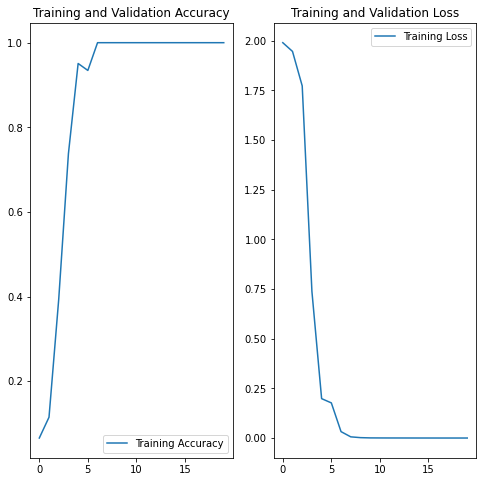

In [23]:
acc = history.history['accuracy']

loss=history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
predictions = model.predict(x_test)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to 정정윤2 with a 31.18 percent confidence.


In [25]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 17ms/step - loss: 0.5377 - accuracy: 0.9375


[0.5376543998718262, 0.9375]

In [22]:
score

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([0.11470152, 0.11470152, 0.11470152, 0.11470152, 0.11470161,
       0.3117908 , 0.11470152], dtype=float32)>